In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

## Loading Train Data

In [2]:
train_dataset = tf.keras.utils.image_dataset_from_directory("Data Set/Train", label_mode='int', color_mode='grayscale', batch_size=32, image_size=(48,48), shuffle=True)

Found 29280 files belonging to 7 classes.


In [3]:
train_dataset = train_dataset.map(lambda x, y: (x/255.0, y))

## Loading Test Data

In [4]:
test_dataset = tf.keras.utils.image_dataset_from_directory("Data Set/Test", label_mode='int', color_mode='grayscale', batch_size=32, image_size=(48,48), shuffle=True)

Found 4271 files belonging to 7 classes.


In [5]:
test_dataset = test_dataset.map(lambda x, y: (x/255.0, y))

## Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Activation, Dropout, Input

In [7]:
model = Sequential()

model.add(Input(shape=(48, 48, 1)))

model.add (Conv2D(8, (3,3), 1, activation='relu'))
model.add (MaxPooling2D())

model.add (Conv2D(16, (3,3), 1, activation='relu'))
model.add (MaxPooling2D())

model.add (Conv2D(8, (3,3), 1, activation='relu'))
model.add (MaxPooling2D())

model.add (Flatten())

model.add (Dense (128, activation='relu'))
model.add (Dropout(0.2))

model.add (Dense (64, activation='relu'))
model.add (Dropout (0.2))

model.add (Dense (7, activation='softmax'))

In [8]:
model.compile (loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,631 (107.93 KB)

 Trainable params: 27,631 (107.93 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [10]:
history = model.fit (train_dataset, epochs=40, validation_data=test_dataset, batch_size=32, shuffle=True)

Epoch 1/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.2256 - loss: 1.8608 - val_accuracy: 0.3571 - val_loss: 1.6683
Epoch 2/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3905 - loss: 1.6025 - val_accuracy: 0.3772 - val_loss: 1.6099
Epoch 3/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4257 - loss: 1.5173 - val_accuracy: 0.3852 - val_loss: 1.5878
Epoch 4/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.4514 - loss: 1.4586 - val_accuracy: 0.4116 - val_loss: 1.5516
Epoch 5/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.4646 - loss: 1.4206 - val_accuracy: 0.4238 - val_loss: 1.5005
Epoch 6/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4818 - loss: 1.3778 - val_accuracy: 0.4238 - val_loss: 1.4878
Epoch 7/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.4922 - loss: 1.3486 - val_accuracy: 0.4327 - val_loss: 1.4844
Epoch 8/40
915/915 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4976 - loss: 1.3274 - 

In [14]:
history.history['val_accuracy']

[0.3570592403411865,
 0.3771950304508209,
 0.38515570759773254,
 0.41161319613456726,
 0.4237883388996124,
 0.4237883388996124,
 0.4326855540275574,
 0.4385389983654022,
 0.4366658926010132,
 0.44111448526382446,
 0.43315383791923523,
 0.445328950881958,
 0.44251930713653564,
 0.4528213441371918,
 0.45352375507354736,
 0.45492857694625854,
 0.46125030517578125,
 0.46733784675598145,
 0.45890891551971436,
 0.4624209702014923,
 0.4652306139469147,
 0.4462655186653137,
 0.4692109525203705,
 0.45890891551971436,
 0.45024585723876953,
 0.4640599489212036,
 0.4692109525203705,
 0.4617185592651367,
 0.46804025769233704,
 0.46663543581962585,
 0.4745961129665375,
 0.46499648690223694,
 0.46569889783859253,
 0.4621868431568146,
 0.45258721709251404,
 0.4710840582847595,
 0.4593771994113922,
 0.47225475311279297,
 0.46593302488327026,
 0.4624209702014923]

## Ploting Training history

In [16]:
epochs = list (range(40))

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

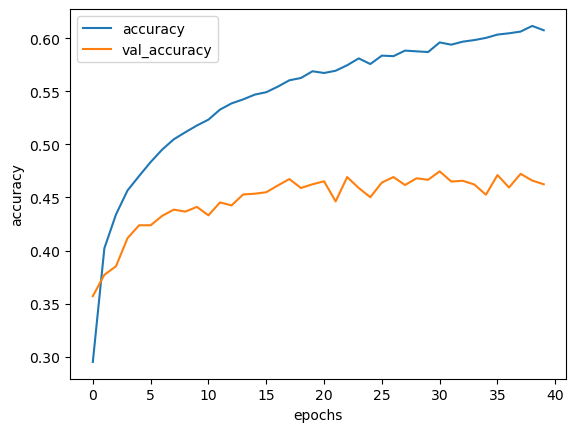

In [17]:
plt.plot(epochs, acc, label='accuracy')
plt.plot (epochs, val_acc, label='val_accuracy')
plt.xlabel ('epochs')
plt.ylabel ('accuracy')
plt.legend()
plt.show()

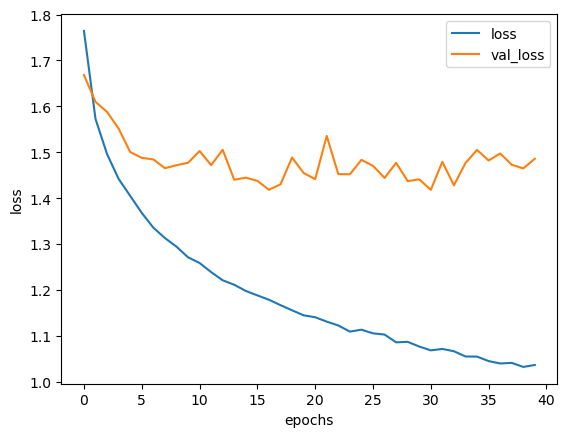

In [18]:
plt.plot(epochs, loss, label='loss')
plt.plot (epochs, val_loss, label='val_loss')
plt.xlabel ('epochs')
plt.ylabel ('loss')
plt.legend()
plt.show()

## Testing Model with test data

In [38]:
def readImages (path):
    folders = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    imageData = []
    imageLabel = []
    for folder in folders:
        folderPath = os.path.join (path, folder)
        for img in os.listdir(folderPath):
            imagePath = os.path.join (folderPath, img)
            image = cv2.imread (imagePath)
            
            image = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
            image = np.reshape(image, (48, 48, 1))
            imageData.append (image)
            imageLabel.append(folders.index(folder))
    
    return imageData, imageLabel

In [39]:
path = "Data Set/Test"

testData, testLabel = readImages (path)

In [40]:
len(testData)

4271

In [41]:
testData[0].shape

(48, 48, 1)

In [42]:
x_test = np.array(testData)

In [43]:
x_test.dtype

dtype('uint8')

In [44]:
x_test = x_test.astype('float32')

In [45]:
x_test.dtype

dtype('float32')

In [46]:
x_test.shape

(4271, 48, 48, 1)

In [47]:
x_test = x_test/255.0

In [48]:
y_pred = model.predict(x_test)

134/134 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [49]:
y_predd = [np.argmax(y_pred[x]) for x in range (0, len(y_pred))]
print(y_predd)

[4, 5, 5, 3, 0, 5, 4, 5, 4, 0, 1, 0, 0, 5, 4, 0, 5, 4, 5, 5, 0, 0, 1, 5, 4, 2, 2, 5, 5, 0, 0, 5, 2, 0, 4, 0, 5, 3, 2, 4, 1, 4, 0, 2, 2, 0, 4, 5, 4, 0, 5, 3, 0, 0, 0, 0, 3, 3, 3, 4, 5, 5, 2, 0, 6, 5, 0, 5, 5, 2, 0, 2, 2, 0, 0, 1, 5, 0, 5, 0, 6, 0, 0, 0, 0, 4, 0, 0, 5, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 5, 3, 2, 6, 4, 3, 2, 5, 0, 4, 0, 4, 2, 3, 0, 5, 0, 0, 5, 4, 5, 5, 4, 0, 4, 0, 0, 5, 5, 6, 5, 3, 5, 0, 4, 0, 4, 4, 5, 6, 6, 5, 4, 0, 0, 4, 0, 0, 5, 0, 0, 4, 0, 5, 0, 0, 0, 5, 5, 0, 0, 4, 0, 5, 0, 6, 0, 0, 1, 0, 1, 0, 2, 0, 6, 0, 0, 0, 0, 4, 0, 4, 5, 5, 4, 4, 3, 2, 0, 6, 3, 0, 2, 4, 0, 4, 3, 4, 5, 4, 4, 0, 0, 0, 4, 6, 4, 2, 4, 0, 0, 0, 0, 4, 0, 3, 0, 0, 5, 0, 2, 2, 4, 4, 0, 0, 3, 2, 0, 4, 3, 6, 3, 3, 4, 3, 2, 4, 0, 4, 4, 4, 2, 1, 1, 0, 3, 0, 5, 0, 0, 1, 0, 0, 5, 2, 2, 1, 4, 0, 0, 0, 0, 0, 5, 5, 0, 2, 2, 5, 0, 0, 0, 0, 2, 5, 4, 3, 1, 1, 5, 4, 3, 0, 5, 5, 0, 2, 4, 0, 0, 0, 5, 4, 4, 5, 0, 4, 3, 0, 0, 5, 4, 0, 0, 0, 4, 5, 0, 5, 0, 1, 3, 4, 0, 4, 3, 4, 4, 5, 5, 0, 5, 2, 0, 4, 0, 4, 

## Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix (testLabel, y_predd)

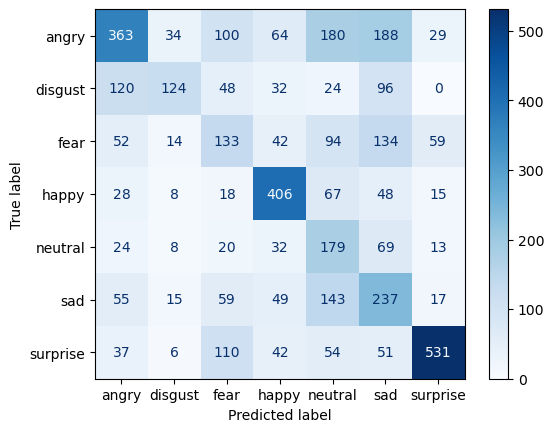

In [51]:
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Accuracy Check

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_predd, testLabel)

0.46195270428471086

## Saving Model

In [15]:
model.save("Face_Emotion2.h5")

## Predictiong on single image

In [65]:
def predictEmotion (imagePath):
    image = cv2.imread(imagePath)
    image = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize (image, (48, 48))
    image = image.astype('float32')
    image = image/255.0
    image = np.reshape (image, (1, 48, 48, 1))
    y_pred = model.predict (image)
    
    if np.argmax(y_pred) == 0:
        return "Angry", np.max(y_pred)
        
    elif  np.argmax(y_pred) == 1:
        return "Disgust", np.max(y_pred)

    elif  np.argmax(y_pred) == 2:
        return "Fear", np.max(y_pred)

    elif  np.argmax(y_pred) == 3:
        return "Happy", np.max(y_pred)

    elif  np.argmax(y_pred) == 4:
        return "Neutral", np.max(y_pred)

    elif  np.argmax(y_pred) == 5:
        return "Sad", np.max(y_pred)

    elif  np.argmax(y_pred) == 6:
        return "Surprise", np.max(y_pred)

    
    

In [66]:
emotion, conf = predictEmotion ('image.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [68]:
print (f"Emotion is {emotion}, Confidence is {conf*100}%")

Emotion is Sad, Confidence is 40.10828137397766%
